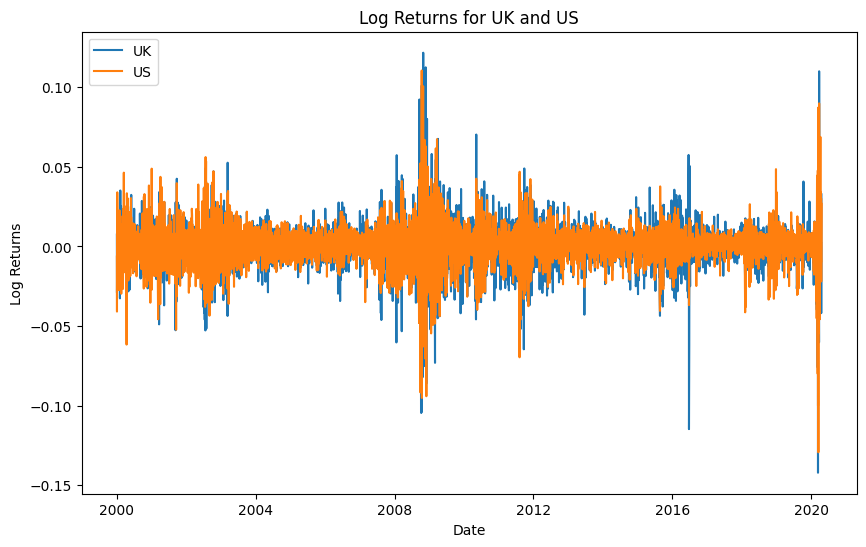

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load financial data
df = pd.read_csv("https://raw.githubusercontent.com/kboroz/TimeSeriesPrediction/refs/heads/main/Data/msci.csv")
df.index = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df = df.drop(["Date"], axis=1)

# Compute log returns
for col in df.columns.values:
    df[col] = np.log(df[col]) - np.log(df[col].shift(1))

df = df.dropna()

# Select the UK and US columns
selected_assets = ["UK", "US"]
df_selected = df[selected_assets]

# Plot log returns for the UK and US
plt.figure(figsize=(10, 6))
for asset in selected_assets:
    plt.plot(df_selected.index, df_selected[asset], label=asset)

plt.title('Log Returns for UK and US')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()


In [ ]:
df.head()

,US,UK,Switzerland,Sweden,Spain,Singapore,Norway,Netherlands,Japan,Italy,HongKong,Germany,France,Denmark,Canada,Belgium,Austria,Australia
Date,,,,,,,,,,,,,,,,,,
2000-01-03,-0.006364,0.007418,0.011909,0.028405,0.007995,0.033686,0.026981,0.015721,0.008980,-0.020180,0.014310,-0.015929,0.007571,0.027345,0.004973,0.001408,0.016172,0.008597
2000-01-04,-0.040896,-0.029006,-0.023266,-0.013283,-0.014809,-0.014969,-0.029136,-0.033486,-0.016367,-0.010596,-0.013452,-0.010644,-0.029656,-0.010718,-0.030336,-0.029099,0.004299,-0.013132
2000-01-05,0.002601,-0.018383,-0.009263,-0.047861,-0.022228,-0.056299,-0.025306,-0.010066,-0.044737,-0.016052,-0.070700,-0.009102,-0.030744,-0.020555,-0.016362,-0.032784,0.004861,-0.023347
2000-01-06,-0.008583,-0.006808,0.012965,0.000126,0.001160,-0.022711,0.011887,-0.007967,-0.038755,-0.016775,-0.044639,-0.006322,-0.004272,0.009259,-0.010937,0.002415,0.001160,-0.007932
2000-01-07,0.033973,0.000371,0.016261,0.004622,0.017736,0.028970,0.010170,0.027949,-0.003075,0.025474,0.018907,0.040592,0.011951,-0.000775,0.050676,0.018796,0.018210,0.010410


In [ ]:
df.tail()

,US,UK,Switzerland,Sweden,Spain,Singapore,Norway,Netherlands,Japan,Italy,HongKong,Germany,France,Denmark,Canada,Belgium,Austria,Australia
Date,,,,,,,,,,,,,,,,,,
2020-04-13,-0.009918,0.002803,-0.002378,-0.004587,-0.003480,0.002318,-0.008649,-0.004631,-0.010449,-0.003480,-0.000763,-0.003480,-0.003480,-0.003488,-0.008167,-0.003480,-0.003480,0.010251
2020-04-14,0.030195,-0.001146,0.018305,0.024901,0.009899,0.026802,0.021863,0.015252,0.026019,0.001423,0.011088,0.018613,0.008414,0.025325,0.018368,0.005320,-0.005426,0.022630
2020-04-15,-0.021979,-0.041876,-0.024715,-0.045527,-0.045714,-0.022380,-0.033482,-0.029768,0.000644,-0.053267,-0.009848,-0.044281,-0.044643,-0.013104,-0.034581,-0.047579,-0.076077,-0.019422
2020-04-16,0.005796,0.000327,0.009349,-0.001003,-0.016050,-0.000681,-0.015976,0.011555,-0.014617,-0.003277,-0.006274,-0.001703,-0.007397,0.011999,-0.008727,-0.003677,-0.030100,-0.013555
2020-04-17,0.026763,0.032708,0.021425,0.040343,0.017258,0.003954,0.038022,0.015309,0.017724,0.018854,0.022720,0.032785,0.038107,0.026031,0.041802,0.024866,0.050529,0.021322


In [ ]:
!pip install pycop

In [ ]:
from pycop import archimedean, estimation
cop = archimedean(family="clayton")

data = df[["US","UK"]].T.values
param, cmle = estimation.fit_cmle(cop, data)
print("Estimated parameter: ", param[0])

Estimated parameter:  0.8025979275662826


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model

# Load financial data
df = pd.read_csv("https://raw.githubusercontent.com/kboroz/TimeSeriesPrediction/refs/heads/main/Data/msci.csv")
df.index = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df = df.drop(["Date"], axis=1)

# Compute log returns
for col in df.columns.values:
    df[col] = np.log(df[col]) - np.log(df[col].shift(1))

df = df.dropna()

# Select assets for the copula-GARCH model
selected_assets = ["US", "UK"]

# Iterate through selected assets and fit GARCH models
for asset in selected_assets:
    returns = df[asset]

    # Assuming the returns are stationary, you can use a simple GARCH(1,1) model
    garch_model = arch_model(returns, vol='Garch', p=1, q=1)
    result = garch_model.fit()

    # Print GARCH model summary for each asset
    print(f"GARCH Model Summary for {asset}:")
    print(result.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 320638042305.50433
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1.1496743272085968e+24
Iteration:      3,   Func. Count:     36,   Neg. LLF: 1192057325379.8582
Iteration:      4,   Func. Count:     50,   Neg. LLF: 2.931974425600556e+22
Iteration:      5,   Func. Count:     65,   Neg. LLF: 1.0662468840767554e+24
Iteration:      6,   Func. Count:     80,   Neg. LLF: 29305598336.218864
Iteration:      7,   Func. Count:     92,   Neg. LLF: 771039215.8776352
Iteration:      8,   Func. Count:    104,   Neg. LLF: 2038344004396768.0
Iteration:      9,   Func. Count:    119,   Neg. LLF: 4245046784574.094
Iteration:     10,   Func. Count:    132,   Neg. LLF: 2.1484014148957857e+23
Iteration:     11,   Func. Count:    147,   Neg. LLF: 4177872287103.1577
Iteration:     12,   Func. Count:    160,   Neg. LLF: 6771313038.220877
Iteration:     13,   Func. Count:    174,   Neg. LLF: 4.776300601090508e+20
Iteration:     14,   Func. Count:   

https://muarch.readthedocs.io/en/latest/examples/Copula-GARCH.html

https://cran.r-project.org/web/packages/copula/vignettes/copula_GARCH.html